In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
def get_waiting_time(min_wait_time, anom_diff_exp):
    
    R = np.random.uniform(0,1)
    waiting_time = min_wait_time / (R**(1/anom_diff_exp))
    
    return waiting_time

(array([1.10454091e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.10564655e-09]),
 array([1.00115544e+00, 9.04449170e+05, 1.80889734e+06, 2.71334551e+06,
        3.61779368e+06, 4.52224185e+06, 5.42669002e+06, 6.33113818e+06,
        7.23558635e+06, 8.14003452e+06, 9.04448269e+06, 9.94893086e+06,
        1.08533790e+07, 1.17578272e+07, 1.26622754e+07, 1.35667235e+07,
        1.44711717e+07, 1.53756199e+07, 1.62800680e+07, 1.71845162e+07,
        1.80889644e+07, 1.89934126e+07, 1.98978607e+07, 2.08023089e+07,
        2.17067571e+07

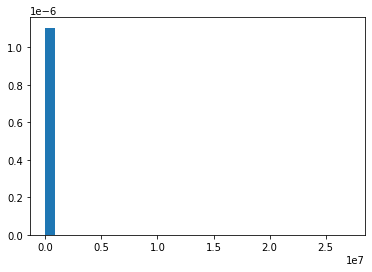

In [78]:
# plotting probability distribution of waiting times as a check
nsamples = 1000
alpha = 0.5  # anomalous diffusion exponent
A = 1  # minimum waiting time in ms 
waiting_times = np.empty((nsamples))
for i in range(nsamples):
    waiting_times[i] = get_waiting_time(A, alpha)
plt.hist(waiting_times, bins=30, density=True)

(array([0.5775076 , 0.4154002 , 0.25835866, 0.27355623, 0.24822695,
        0.16717325, 0.10638298, 0.13677812, 0.1266464 , 0.0810537 ,
        0.05065856, 0.04559271, 0.05572442, 0.08611955, 0.06585613,
        0.06585613, 0.07092199, 0.05065856, 0.03039514, 0.03039514,
        0.04559271, 0.04559271, 0.02026342, 0.03039514, 0.04559271,
        0.04559271, 0.04052685, 0.04559271, 0.04559271, 0.02532928]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <BarContainer object of 30 artists>)

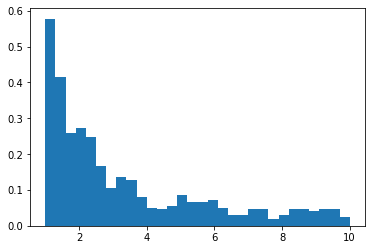

In [79]:
plt.hist(waiting_times, bins=30, range=(A, 10), density=True)

In [80]:
def gaussian_step(D, t, ndim=1):
    
    var = 2*ndim*D*t
    dx = np.random.normal(scale=np.sqrt(var))
    return dx

(array([0.00520629, 0.        , 0.00104126, 0.00624755, 0.00833007,
        0.01041259, 0.01145385, 0.01561888, 0.02603147, 0.02603147,
        0.04269161, 0.06039301, 0.09058951, 0.07809441, 0.09475455,
        0.08538322, 0.08642448, 0.08434196, 0.08017692, 0.04373287,
        0.03956783, 0.03644406, 0.02915525, 0.02603147, 0.02603147,
        0.01041259, 0.00312378, 0.00520629, 0.00416504, 0.00416504]),
 array([-14.96578901, -14.00541293, -13.04503686, -12.08466078,
        -11.1242847 , -10.16390863,  -9.20353255,  -8.24315647,
         -7.2827804 ,  -6.32240432,  -5.36202824,  -4.40165217,
         -3.44127609,  -2.48090001,  -1.52052394,  -0.56014786,
          0.40022822,   1.36060429,   2.32098037,   3.28135645,
          4.24173252,   5.2021086 ,   6.16248467,   7.12286075,
          8.08323683,   9.0436129 ,  10.00398898,  10.96436506,
         11.92474113,  12.88511721,  13.84549329]),
 <BarContainer object of 30 artists>)

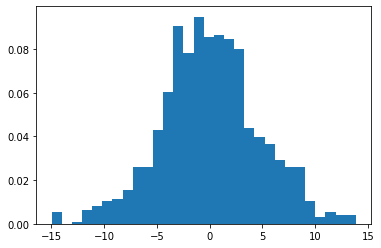

In [81]:
# plotting probability distribution of step lengths as a check
nsamples = 1000
D=10
t=1
step_lengths = np.empty((nsamples))
for i in range(nsamples):
    step_lengths[i] = gaussian_step(D, t)
plt.hist(step_lengths, bins=30, density=True)

In [103]:
# CTRW for single particle in 1D
def ctrw(x_start, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp):
    """
    Be consistent with units
    run_time: simulation time 
    diff_time: diffusion time
    min_wait_time: minimum waiting time
    """
    time = 0
    x = x_start
    times = np.array([time])
    xs = np.array([x])
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time  # update current time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        x += gaussian_step(diff_coeff, diff_time)  # update current x position
        times = np.append(times, time)
        xs = np.append(xs, x)
    
    data = {'t': times, 'x': xs}
    df = pd.DataFrame(data)
    return df

In [113]:
# what units is DaMaRiS diffusion coefficient in?
# times in ps:
df = ctrw(0, 2.8e11, 1, 1e15, 1e9, 0.5)

In [114]:
df

,t,x
0,0.000000e+00,0.000000e+00
1,1.130145e+09,0.000000e+00
2,1.130145e+09,-9.700997e+04
3,2.170566e+09,-9.700997e+04
4,2.170566e+09,-4.002478e+05
...,...,...
1268,8.560567e+14,5.247446e+06
1269,8.561190e+14,5.247446e+06
1270,8.561190e+14,4.126452e+06
1271,1.794727e+15,4.126452e+06


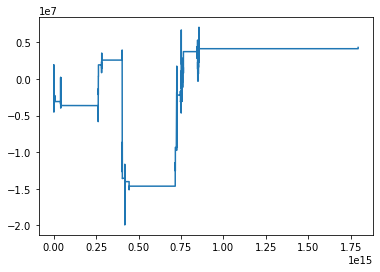

In [115]:
plt.plot(df['t'], df['x'])